In [1]:
import numpy as np
from numpy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from astropy.io import fits

## Reading the Files

### Broad Band

In [2]:
#Observation 1
result_b_1 = fits.open('acisf08025_000N021_r0086b_lc3.fits')
print(result_b_1.info())
resolution_b_1 = result_b_1[1].header['TIMEDEL']
print(f'Time resolution_1 = {resolution_b_1} s')
date_start_1 = result_b_1[1].header['DATE-OBS']
date_end_1 = result_b_1[1].header['DATE-END']
print(f'Observation Timeline : {date_start_1} to {date_end_1}\n\n')

#Observation 2
result_b_2 = fits.open('acisf08026_000N021_r0042b_lc3.fits')
print(result_b_2.info())
resolution_b_2 = result_b_2[1].header['TIMEDEL']
print(f'Time resolution_2 = {resolution_b_2} s')
date_start_2 = result_b_2[1].header['DATE-OBS']
date_end_2 = result_b_2[1].header['DATE-END']
print(f'Observation Timeline : {date_start_2} to {date_end_2}\n\n')


#Observation 3
result_b_3 = fits.open('acisf15221_000N021_r0018b_lc3.fits')
print(result_b_3.info())
resolution_b_3 = result_b_3[1].header['TIMEDEL']
print(f'Time resolution_3 = {resolution_b_3} s')
date_start_3 = result_b_3[1].header['DATE-OBS']
date_end_3 = result_b_3[1].header['DATE-END']
print(f'Observation Timeline : {date_start_3} to {date_end_3}\n\n')


#Observation 4
result_b_4 = fits.open('acisf15222_000N021_r0020b_lc3.fits')
print(result_b_4.info())
resolution_b_4 = result_b_4[1].header['TIMEDEL']
print(f'Time resolution_4 = {resolution_b_4} s')
date_start_4 = result_b_4[1].header['DATE-OBS']
date_end_4 = result_b_4[1].header['DATE-END']
print(f'Observation Timeline : {date_start_4} to {date_end_4}\n\n')

Filename: acisf08025_000N021_r0086b_lc3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU    164   2985R x 5C   [1D, 1D, 1D, 1D, 1D]   
  2  BKGLIGHTCURVE    1 BinTableHDU    169   2985R x 5C   [1D, 1D, 1D, 1D, 1D]   
None
Time resolution_1 = 16.667752683163 s
Observation Timeline : 2007-04-12T11:58:39 to 2007-04-13T02:09:03


Filename: acisf08026_000N021_r0042b_lc3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU    164   2859R x 5C   [1D, 1D, 1D, 1D, 1D]   
  2  BKGLIGHTCURVE    1 BinTableHDU    169   2859R x 5C   [1D, 1D, 1D, 1D, 1D]   
None
Time resolution_2 = 16.676075518131 s
Observation Timeline : 2007-04-13T07:32:19 to 2007-04-13T21:09:17


Filename: acisf15221_000N021_r0018b_lc3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU  

## Extracting the Data

### Broad Band

In [3]:
%matplotlib inline
#OBSERVATION 1
lc_b_1 = result_b_1[1].data #Lightcurve

#arrays
time_b_1 = lc_b_1['Time']
count_rate_b_1 = lc_b_1['COUNT_RATE']
count_rate_err_b_1 = lc_b_1['COUNT_RATE_ERR']

#starting time from zero
dt_b_1 = time_b_1 - time_b_1[0]



#OBSERVATION 2
lc_b_2 = result_b_2[1].data #Lightcurve

#arrays
time_b_2 = lc_b_2['Time']
count_rate_b_2 = lc_b_2['COUNT_RATE']
count_rate_err_b_2 = lc_b_2['COUNT_RATE_ERR']

#starting time from zero
dt_b_2 = time_b_2 - time_b_2[0]



#OBSERVATION 3
lc_b_3 = result_b_3[1].data #Lightcurve

#arrays
time_b_3 = lc_b_3['Time']
count_rate_b_3 = lc_b_3['COUNT_RATE']
count_rate_err_b_3 = lc_b_3['COUNT_RATE_ERR']

#starting time from zero
dt_b_3 = time_b_3 - time_b_3[0]



#OBSERVATION 4
lc_b_4 = result_b_4[1].data #Lightcurve

#arrays
time_b_4 = lc_b_4['Time']
count_rate_b_4 = lc_b_4['COUNT_RATE']
count_rate_err_b_4 = lc_b_4['COUNT_RATE_ERR']

#starting time from zero
dt_b_4 = time_b_4 - time_b_4[0]



#CONCATENATING THE DATA ACROSS OBSERVATIONS
#time = np.concatenate((time_b_1, time_b_2, time_b_3, time_b_4))
#count_rate = np.concatenate((count_rate_b_1,count_rate_b_2, count_rate_b_3, count_rate_b_4))


## Representing the Data

### Broad Band

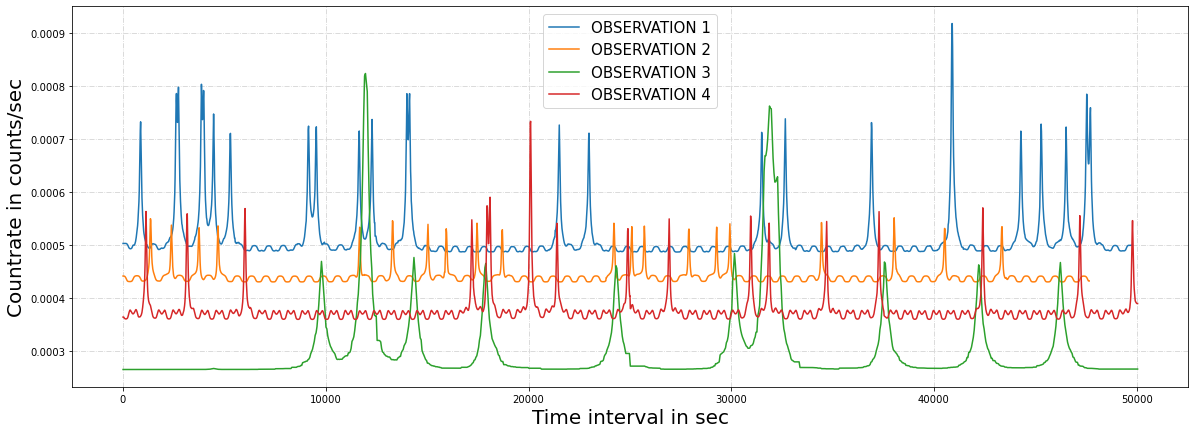

In [4]:
plt.figure(figsize = [20,7], facecolor = 'w')
plt.plot(dt_b_1, count_rate_b_1, label = 'OBSERVATION 1')  #OBSERVATION 1
plt.plot(dt_b_2, count_rate_b_2, label = 'OBSERVATION 2')  #OBSERVATION 2
plt.plot(dt_b_3, count_rate_b_3, label = 'OBSERVATION 3')  #OBSERVATION 3
plt.plot(dt_b_4, count_rate_b_4, label = 'OBSERVATION 4')  #OBSERVATION 4
plt.grid(color = 'lightgrey', ls = '-.')
plt.xlabel('Time interval in sec', fontsize = 20)
plt.ylabel('Countrate in counts/sec', fontsize = 20)
#plt.title(f'plot of {file_name}', fontsize = 20)
#plt.text(10000,2.8e-5, s = f'resolution = {resolution} s', fontsize = 20)
#plt.xlim(0,40000)
#plt.ylim(0,0.0009)
plt.legend(fontsize = 15)

## Binning the Data


### Observation 1


Binned resolution is 466.69707512856394s


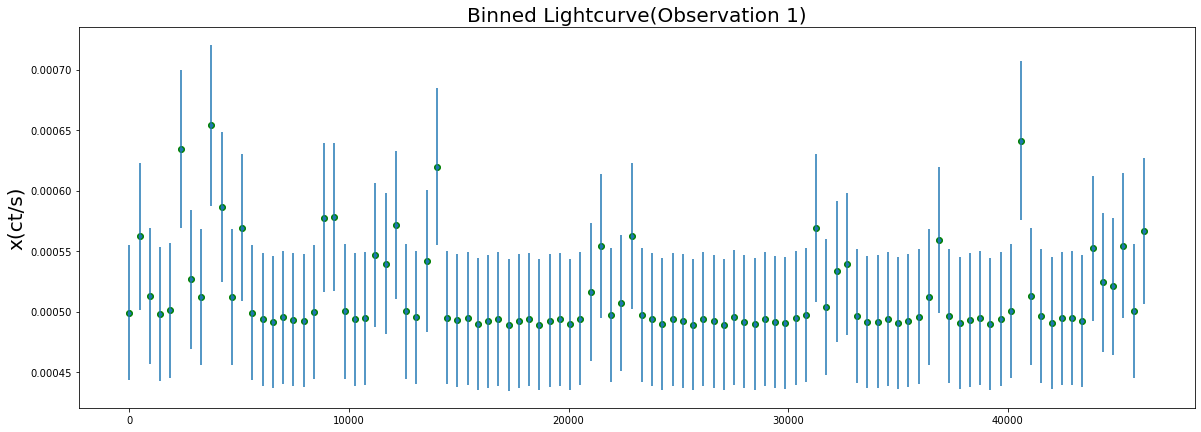

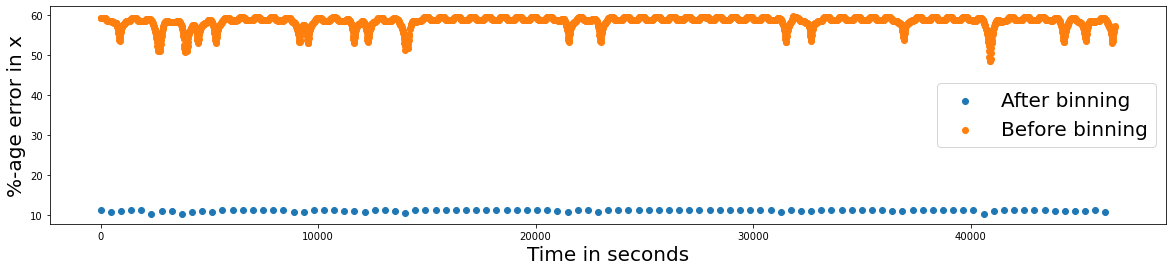

In [90]:
n_total_b_1 = 2800 #Total data points
n_bin_b_1 = 100 #Number of bins
bin_size_b_1 = int(n_total_b_1/n_bin_b_1) #Bin size in units of data points
binned_resolution_b_1 = bin_size_b_1*resolution_b_1
print(f'Binned resolution is {binned_resolution_b_1}s')

cr_binned_b_1= np.zeros(n_bin_b_1)
t_binned_b_1= np.zeros(n_bin_b_1)
err_binned_b_1 = np.zeros(n_bin_b_1)

for i in range(n_bin_b_1):
    t_binned_b_1[i] = dt_b_1[bin_size_b_1*i]
for i in range(n_bin_b_1):
    sum_err_sq = 0
    for j in range((bin_size_b_1)):
        #summing and averaging all the counts 
        cr_binned_b_1[i] += count_rate_b_1[j+i*bin_size_b_1]/bin_size_b_1
        #summing square errors
        sum_err_sq += count_rate_err_b_1[j+i*bin_size_b_1]**2 
    err_binned_b_1[i] = (sum_err_sq/bin_size_b_1**2)**0.5 

#Percentage error before and after binning
err_percent_binned_b_1 = []
err_percent_b_1 = []
for i in range(n_bin_b_1):
    err_percent_binned_b_1.append((err_binned_b_1[i]/cr_binned_b_1[i])*100)
for i in range(n_total_b_1):
    err_percent_b_1.append((count_rate_err_b_1[i]/count_rate_b_1[i])*100)
    
plt.figure(figsize = [20,7], facecolor = 'w')
plt.scatter(t_binned_b_1,cr_binned_b_1,c='green')
plt.errorbar(t_binned_b_1, cr_binned_b_1, err_binned_b_1,fmt = '.')
plt.title('Binned Lightcurve(Observation 1)', fontsize = 20)
plt.ylabel('x(ct/s)', fontsize = 20)
plt.figure(figsize = [20,4], facecolor = 'w')
plt.scatter(t_binned_b_1,err_percent_binned_b_1, label = 'After binning')
plt.scatter(dt_b_1[:n_total_b_1],err_percent_b_1, label = 'Before binning')
#plt.ylim(9.3,11)
plt.ylabel('%-age error in x', fontsize = 20)
plt.xlabel('Time in seconds', fontsize = 20)
plt.legend(fontsize = 20)

### Observation 2


Binned resolution is 166.76075518131s


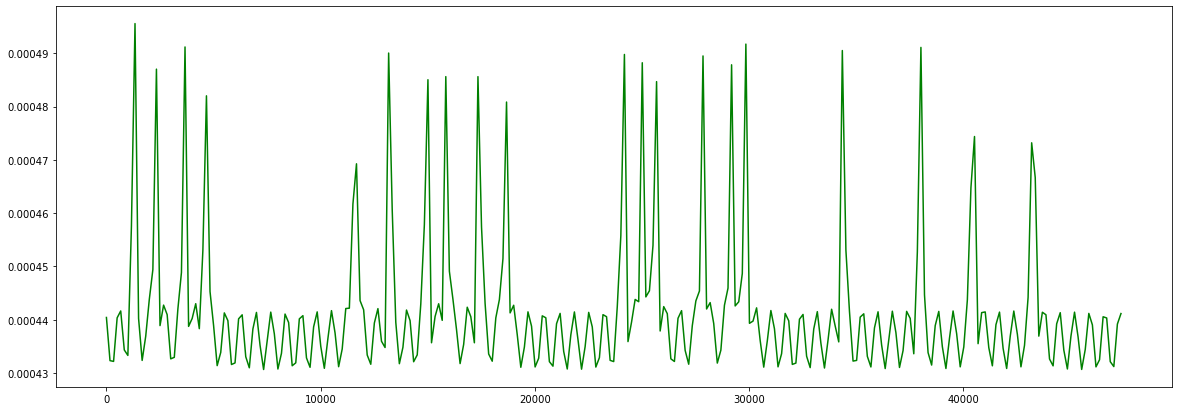

In [93]:
n_total_b_2 = 2850 #Total data points(Truncated)
n_bin_b_2 = 285 #Number of bins
bin_size_b_2 = int(n_total_b_2/n_bin_b_2) #Bin size in units of data points
binned_resolution_b_2 = bin_size_b_2*resolution_b_2
print(f'Binned resolution is {binned_resolution_b_2}s')

cr_binned_b_2= np.zeros(n_bin_b_2)
t_binned_b_2= np.zeros(n_bin_b_2)

for i in range(n_bin_b_2):
    t_binned_b_2[i] = dt_b_2[bin_size_b_2*i]
for i in range(n_bin_b_2):
    for j in range((bin_size_b_2)):
        #summing all the counts 
        cr_binned_b_2[i] += count_rate_b_2[j+i*bin_size_b_2]/bin_size_b_2

plt.figure(figsize = [20,7], facecolor = 'w')
plt.plot(t_binned_b_2,cr_binned_b_2,c='green')
#plt.ylim(0.012,0.014)
#plt.xlim(0,10000)

### Observation 3


Binned resolution is 487.16628009080904s


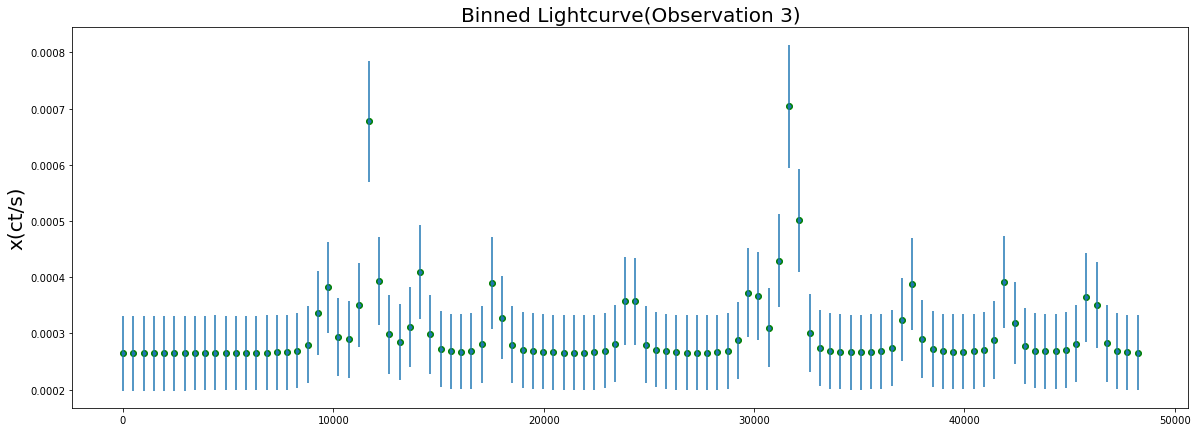

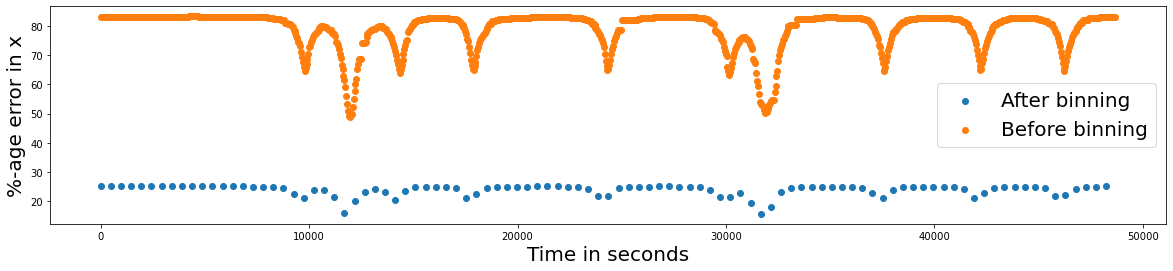

In [94]:
n_total_b_3 = 1100 #Total data points(Truncated)
n_bin_b_3 = 100 #Number of bins
bin_size_b_3 = int(n_total_b_3/n_bin_b_3) #Bin size in units of data points
binned_resolution_b_3 = bin_size_b_3*resolution_b_3
print(f'Binned resolution is {binned_resolution_b_3}s')

cr_binned_b_3= np.zeros(n_bin_b_3)
t_binned_b_3= np.zeros(n_bin_b_3)
err_binned_b_3 = np.zeros(n_bin_b_3)

for i in range(n_bin_b_3):
    t_binned_b_3[i] = dt_b_3[bin_size_b_3*i]
for i in range(n_bin_b_3):
        sum_err_sq = 0 
        for j in range((bin_size_b_3)):
            #summing all the counts 
            cr_binned_b_3[i] += count_rate_b_3[j+i*bin_size_b_3]/bin_size_b_3
            #summing square errors
            sum_err_sq += count_rate_err_b_3[j+i*bin_size_b_3]**2 
        err_binned_b_3[i] = (sum_err_sq/bin_size_b_3**2)**0.5 

#Percentage error before and after binning
err_percent_binned_b_3 = []
err_percent_b_3 = []
for i in range(n_bin_b_3):
    err_percent_binned_b_3.append((err_binned_b_3[i]/cr_binned_b_3[i])*100)
for i in range(n_total_b_3):
    err_percent_b_3.append((count_rate_err_b_3[i]/count_rate_b_3[i])*100)

plt.figure(figsize = [20,7], facecolor = 'w')
plt.scatter(t_binned_b_3,cr_binned_b_3,c='green')
plt.errorbar(t_binned_b_3, cr_binned_b_3, err_binned_b_3,fmt = '.')
plt.title('Binned Lightcurve(Observation 3)', fontsize = 20)
plt.ylabel('x(ct/s)', fontsize = 20)
plt.figure(figsize = [20,4], facecolor = 'w')
plt.scatter(t_binned_b_3,err_percent_binned_b_3, label = 'After binning')
plt.scatter(dt_b_3[:n_total_b_3],err_percent_b_3, label = 'Before binning')
plt.ylabel('%-age error in x', fontsize = 20)
plt.xlabel('Time in seconds', fontsize = 20)
plt.legend(fontsize = 20)

### Observation 4

Binned resolution is 166.70662820339s


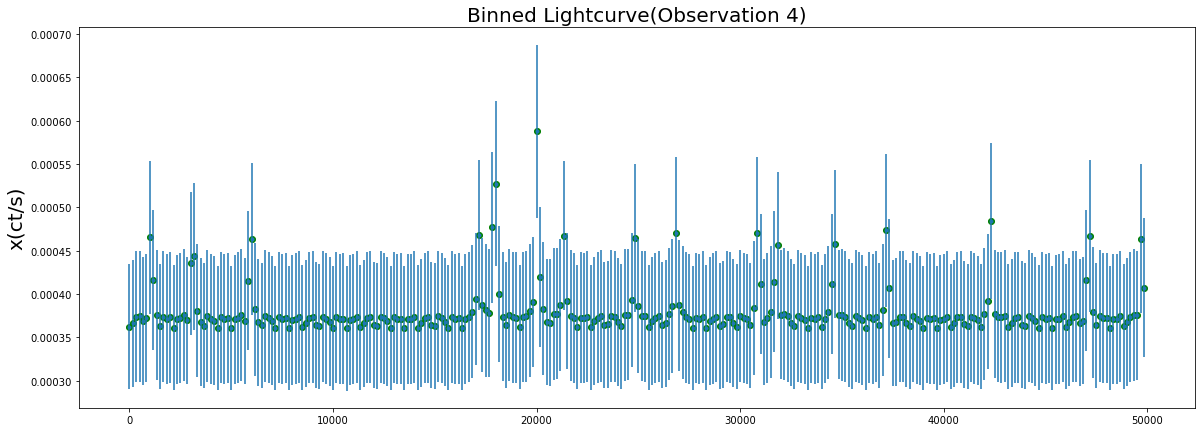

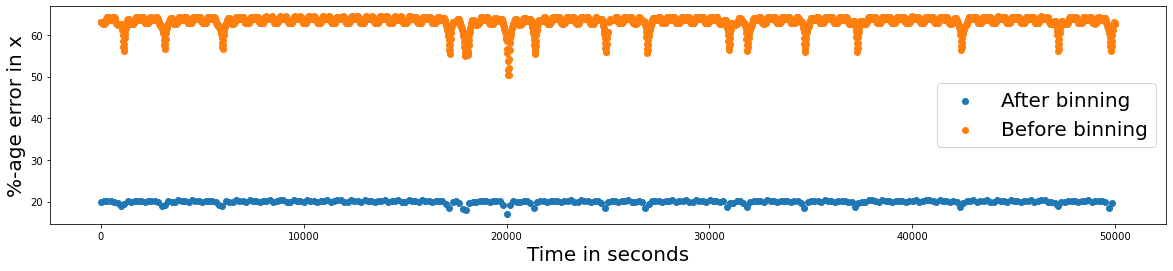

In [91]:
n_total_b_4 = 3000 #Total data points(Truncated)
n_bin_b_4 = 300 #Number of bins
bin_size_b_4 = int(n_total_b_4/n_bin_b_4) #Bin size in units of data points
binned_resolution_b_4 = bin_size_b_4*resolution_b_4
print(f'Binned resolution is {binned_resolution_b_4}s')

cr_binned_b_4= np.zeros(n_bin_b_4)
t_binned_b_4= np.zeros(n_bin_b_4)
err_binned_b_4 = np.zeros(n_bin_b_4)

for i in range(n_bin_b_4):
    t_binned_b_4[i] = dt_b_4[bin_size_b_4*i]
for i in range(n_bin_b_4):
    sum_err_sq = 0 
    for j in range((bin_size_b_4)):
        #summing all the counts 
        cr_binned_b_4[i] += count_rate_b_4[j+i*bin_size_b_4]/bin_size_b_4
        #summing square errors
        sum_err_sq += count_rate_err_b_4[j+i*bin_size_b_4]**2 
    err_binned_b_4[i] = (sum_err_sq/bin_size_b_4**2)**0.5 

#Percentage error before and after binning
err_percent_binned_b_4 = []
err_percent_b_4 = []
for i in range(n_bin_b_4):
    err_percent_binned_b_4.append((err_binned_b_4[i]/cr_binned_b_4[i])*100)
for i in range(n_total_b_4):
    err_percent_b_4.append((count_rate_err_b_4[i]/count_rate_b_4[i])*100)

plt.figure(figsize = [20,7], facecolor = 'w')
plt.scatter(t_binned_b_4,cr_binned_b_4,c='green')
plt.errorbar(t_binned_b_4, cr_binned_b_4, err_binned_b_4,fmt = '.')
plt.title('Binned Lightcurve(Observation 4)', fontsize = 20)
plt.ylabel('x(ct/s)', fontsize = 20)
plt.figure(figsize = [20,4], facecolor = 'w')
plt.scatter(t_binned_b_4,err_percent_binned_b_4, label = 'After binning')
plt.scatter(dt_b_4[:n_total_b_4],err_percent_b_4, label = 'Before binning')
#plt.ylim(9.3,11)
plt.ylabel('%-age error in x', fontsize = 20)
plt.xlabel('Time in seconds', fontsize = 20)
plt.legend(fontsize = 20)

## Fast Fourier Transform (Marked Down)

fft_val = abs(fft(cr_binned_b_3)) #raw abs output of the fft
freq = fftfreq(len(t_binned_b_3)) #creating the necessary frequencies

mask = freq > 0 #masking for taking only positive half

power = 2*(fft_val**2)*resolution/len(time) #scaling the raw values (factor of 2 is used because we are taking only positve half of the freq)

#positive frequencies and corresponding power
freq_pos = freq[mask]
power_pos = power[mask]

#for PSD
#power 

plt.figure(figsize = [20,7], facecolor = 'w')
plt.step(np.log10(freq[mask]), np.log10(power[mask]))
#plt.xlim(0,0.075)
plt.xlabel('log of Frequencies in Hz', fontsize = 20)
plt.ylabel('log of Power', fontsize = 20)

## Statistics from the binned light curve

### Observation 1

print(result_b_1.info())
print(f'Time resolution_1 = {resolution_b_1} s')
print(f'Observation Timeline : {date_start_1} to {date_end_1}\n\n')

#TRUNCATING DATA AS PER NEEDED
count_truncated = count_rate_b_1[:2800]
dtime_truncated = dt_b_1[:2800]
count_err_truncated = count_rate_err_b_1[:2800]

plt.figure(figsize = [20,7])
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.plot(dt_b_1, count_rate_b_1)
ax1.set_xlim(0,50000)
ax1.set_title('Original(2895 points)', fontsize = 20)
ax2.plot(dtime_truncated, count_truncated)
ax2.set_xlim(0,50000)
ax2.set_title('Truncated (2800 points)', fontsize = 20)

(array([-2.00e-09, -1.95e-09, -1.90e-09, -1.85e-09, -1.80e-09, -1.75e-09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

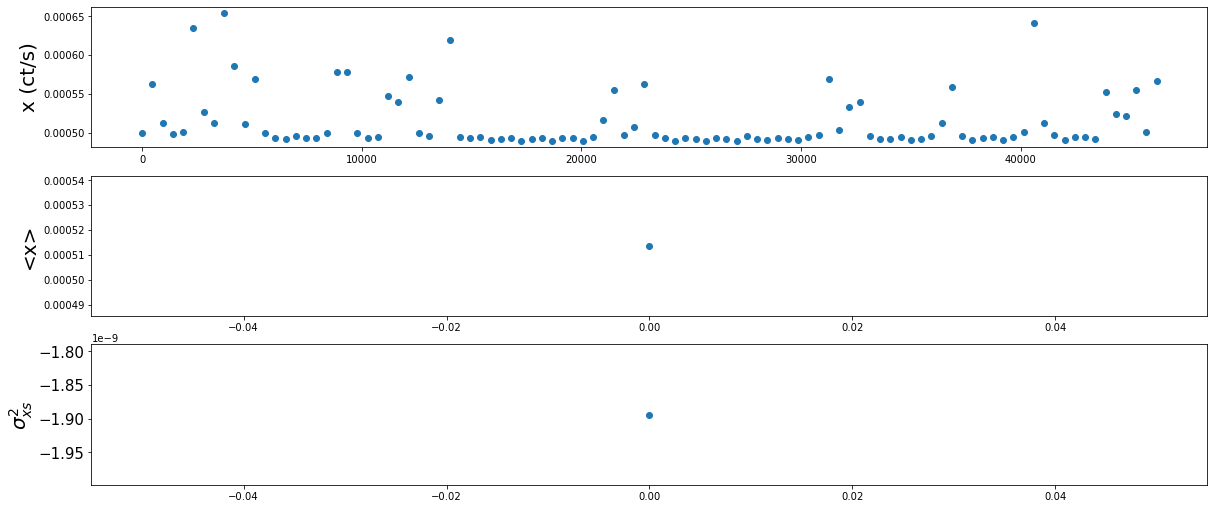

In [102]:
#MAKING AVG FLUX OF EVERY 20 POINTS
n_binned = 100 #Total data points(already binned)
bin_size = 100 #size of the bin in data points
n_points = int(n_binned/bin_size) #no. of data points

#print(n_points)
t_avg = [] #time for avg count of 20
c_avg = [] #avg count rate on 20 points bin
for i in range(n_points):
    t_avg.append(t_binned_b_1[i*bin_size])
    #print(i,i*25)
    sum = 0
    for j in range(bin_size):
        sum += cr_binned_b_1[j+i*bin_size]
    c_avg.append(sum/bin_size)
    
var = [] #variance
xs_var = [] #excess variance
for i in range(n_points):
    sum = 0
    sum_err_sq = 0 #sum of squared err
    for j in range(0,bin_size):
        sum += (cr_binned_b_1[j+i*bin_size] - c_avg[i])**2
        sum_err_sq += (err_binned_b_1[j+i*bin_size])**2
    avg_sum_err_sq = sum_err_sq/bin_size
    #print('err ',avg_sum_err_sq)
    #print('var ',sum/19)
    var.append(sum/(bin_size - 1))
    xs_var.append(var[i] - avg_sum_err_sq)

#EXPECTATION VALUE OF VARIANCE
'''
expect_var = []
t_further = []
for i in range(7):
    sum = 0
    t_further.append(t_avg[i*20])
    for j in range(20):
        sum += var[j+i*20]
    expect_var.append(sum/20)
'''    
#PLOTTING
plt.figure(figsize = [20,15])
ax1 = plt.subplot(511)
ax2 = plt.subplot(512)
ax3 = plt.subplot(513)
#ax4 = plt.subplot(514)
ax1.scatter(t_binned_b_1, cr_binned_b_1)
ax1.set_ylabel('x (ct/s)', fontsize = 20)
ax2.scatter(t_avg, c_avg)
ax2.set_ylabel('<x>', fontsize = 20)
ax3.scatter(t_avg, xs_var)
ax3.set_ylabel('$σ_{xs}^2$', fontsize = 20)
plt.yticks(fontsize = 15)
#ax3.set_yscale('log')
#ax4.scatter(t_further, expect_var)
#ax4.set_ylabel('<$S^2$>', fontsize = 20)
#ax4.set_yscale('log')

### Observation 3

Text(0, 0.5, '$σ_{NXS}^2$')

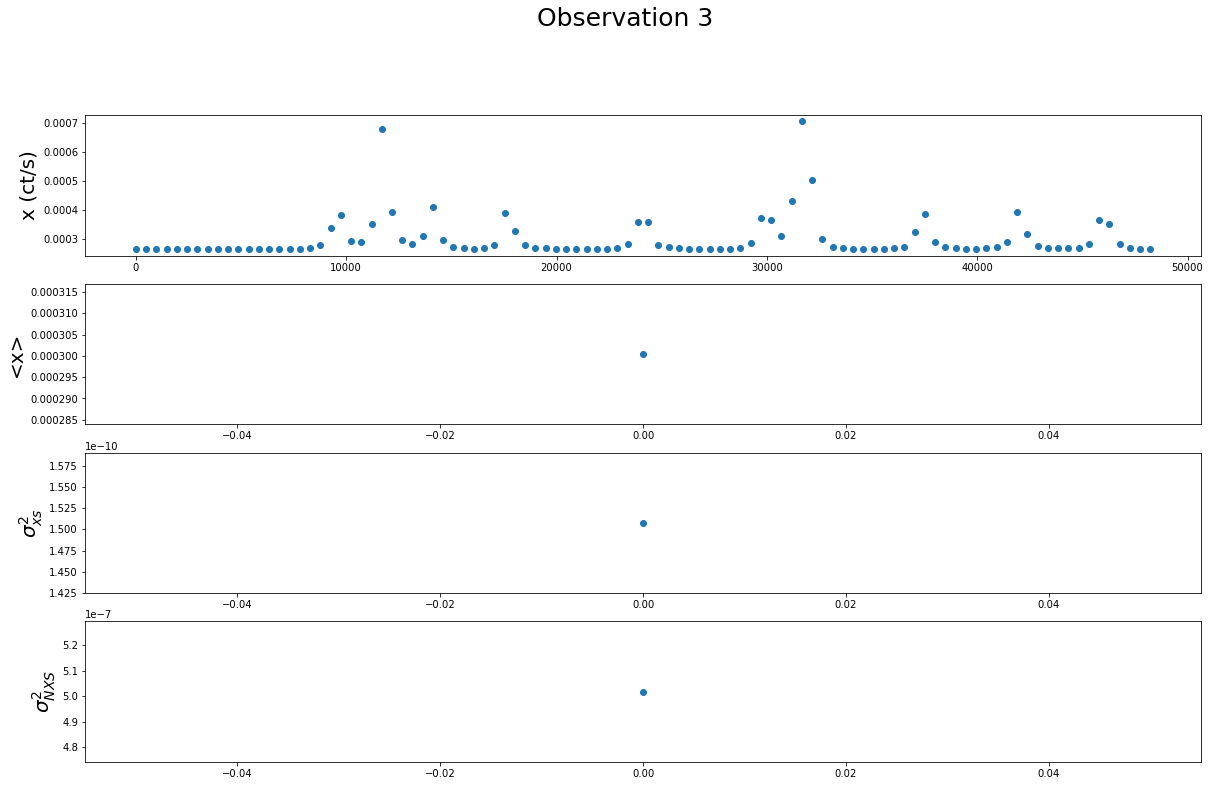

In [99]:
#MAKING AVG FLUX OF EVERY 20 POINTS
n_binned = 100 #Total data points(already binned)
bin_size = 100 #size of the bin in data points
n_points = int(n_binned/bin_size) #no. of data points

#print(n_points)
t_avg = [] #time for avg count of 20
c_avg = [] #avg count rate on 20 points bin
for i in range(n_points):
    t_avg.append(t_binned_b_3[i*bin_size])
    #print(i,i*25)
    sum = 0
    for j in range(bin_size):
        sum += cr_binned_b_3[j+i*bin_size]
    c_avg.append(sum/bin_size)
    
var = [] #variance
xs_var = [] #excess variance
for i in range(n_points):
    sum = 0
    sum_err_sq = 0 #sum of squared err
    for j in range(0,bin_size):
        sum += (cr_binned_b_3[j+i*bin_size] - c_avg[i])**2
        sum_err_sq += (err_binned_b_3[j+i*bin_size])**2
    avg_err_sq = sum_err_sq/bin_size
    var.append(sum/(bin_size - 1))
    xs_var.append(var[i] - avg_err_sq)

#NORMALIZATION OF XS_VARIANCE
norm_xs_var = []
for i in range(n_points):
    norm_xs_var.append(xs_var[i]/c_avg[i])
    
#EXPECTATION VALUE OF VARIANCE
'''
expect_var = []
t_further = []
for i in range(7):
    sum = 0
    t_further.append(t_avg[i*20])
    for j in range(20):
        sum += var[j+i*20]
    expect_var.append(sum/20)
'''    
#PLOTTING
fig = plt.figure(figsize = [20,15], facecolor = 'w')
plt.suptitle('Observation 3', fontsize = 25, )
ax1 = plt.subplot(511)
ax2 = plt.subplot(512)
ax3 = plt.subplot(513)
ax4 = plt.subplot(514)
ax1.scatter(t_binned_b_3, cr_binned_b_3)
ax1.set_ylabel('x (ct/s)', fontsize = 20)
ax2.scatter(t_avg, c_avg)
ax2.set_ylabel('<x>', fontsize = 20)
ax3.scatter(t_avg, xs_var)
ax3.set_ylabel('$σ_{xs}^2$', fontsize = 20)
#ax3.set_yscale('log')
ax4.scatter(t_avg, norm_xs_var)
ax4.set_ylabel('$σ_{NXS}^2$', fontsize = 20)
#ax4.set_yscale('log')
#ax4.scatter(t_further, expect_var)
#ax4.set_ylabel('<$S^2$>', fontsize = 20)
#ax4.set_yscale('log')

### Observation 4

(array([-5.6e-09, -5.5e-09, -5.4e-09, -5.3e-09, -5.2e-09, -5.1e-09,
        -5.0e-09, -4.9e-09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

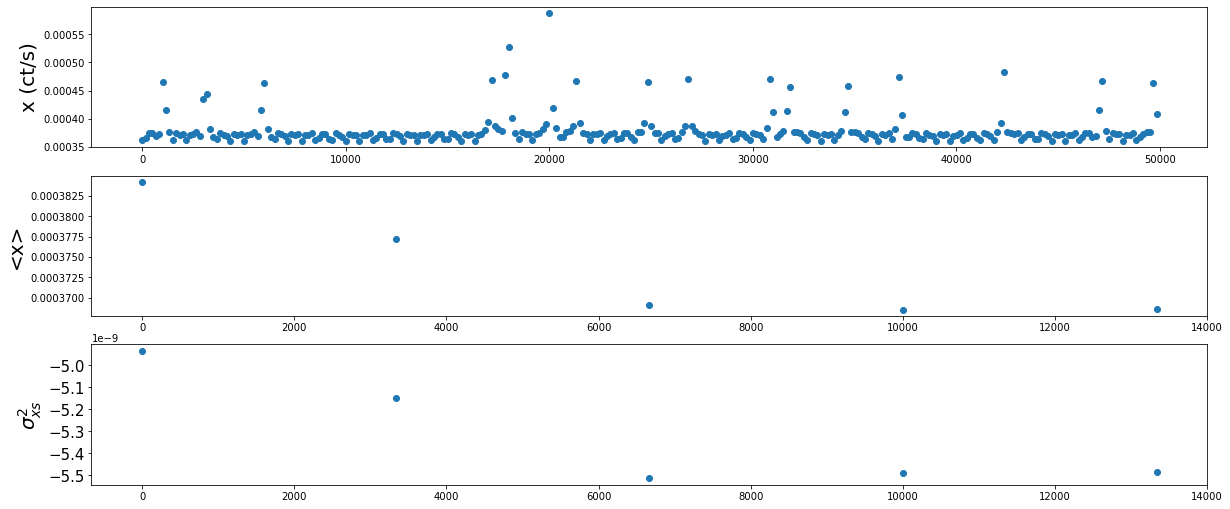

In [100]:
#MAKING AVG FLUX OF EVERY 20 POINTS
n_binned = 100 #Total data points(already binned)
bin_size = 20 #size of the bin in data points
n_points = int(n_binned/bin_size) #no. of data points

#print(n_points)
t_avg = [] #time for avg count of 20
c_avg = [] #avg count rate on 20 points bin
for i in range(n_points):
    t_avg.append(t_binned_b_4[i*bin_size])
    #print(i,i*25)
    sum = 0
    for j in range(bin_size):
        sum += cr_binned_b_4[j+i*bin_size]
    c_avg.append(sum/bin_size)
    
var = [] #variance
xs_var = [] #excess variance
for i in range(n_points):
    sum = 0
    sum_err_sq = 0 #sum of squared err
    for j in range(0,bin_size):
        sum += (cr_binned_b_4[j+i*bin_size] - c_avg[i])**2
        sum_err_sq += (err_binned_b_4[j+i*bin_size])**2
    avg_sum_err_sq = sum_err_sq/bin_size
    #print('err ',avg_sum_err_sq)
    #print('var ',sum/19)
    var.append(sum/(bin_size - 1))
    xs_var.append(var[i] - avg_sum_err_sq)

#EXPECTATION VALUE OF VARIANCE
'''
expect_var = []
t_further = []
for i in range(7):
    sum = 0
    t_further.append(t_avg[i*20])
    for j in range(20):
        sum += var[j+i*20]
    expect_var.append(sum/20)
'''    
#PLOTTING
plt.figure(figsize = [20,15])
ax1 = plt.subplot(511)
ax2 = plt.subplot(512)
ax3 = plt.subplot(513)
#ax4 = plt.subplot(514)
ax1.scatter(t_binned_b_4, cr_binned_b_4)
ax1.set_ylabel('x (ct/s)', fontsize = 20)
ax2.scatter(t_avg, c_avg)
ax2.set_ylabel('<x>', fontsize = 20)
ax3.scatter(t_avg, xs_var)
ax3.set_ylabel('$σ_{xs}^2$', fontsize = 20)
plt.yticks(fontsize = 15)
#ax3.set_yscale('log')
#ax4.scatter(t_further, expect_var)
#ax4.set_ylabel('<$S^2$>', fontsize = 20)
#ax4.set_yscale('log')

## Histogram of count rate


### Observation 3


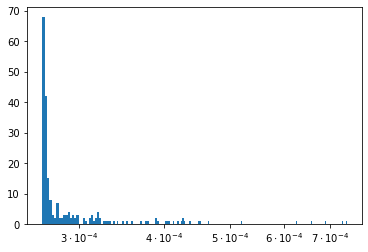

In [72]:
plt.hist(cr_sorted_3, bins = 220)
plt.xscale('logit')

## PSD


### Observation 1


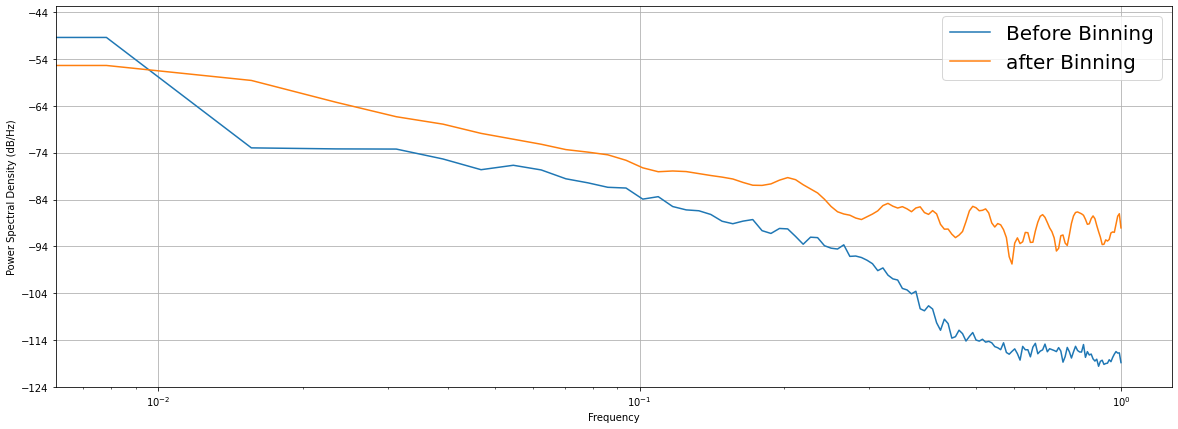

In [112]:
plt.figure(figsize = [20,7])
plt.title('Observation 1')
x = plt.psd(count_rate_b_1, label = 'Before Binning')
x = plt.psd(cr_binned_b_1, label = 'after Binning')
plt.legend(fontsize = 20)
plt.xscale('log')


### Observation 3

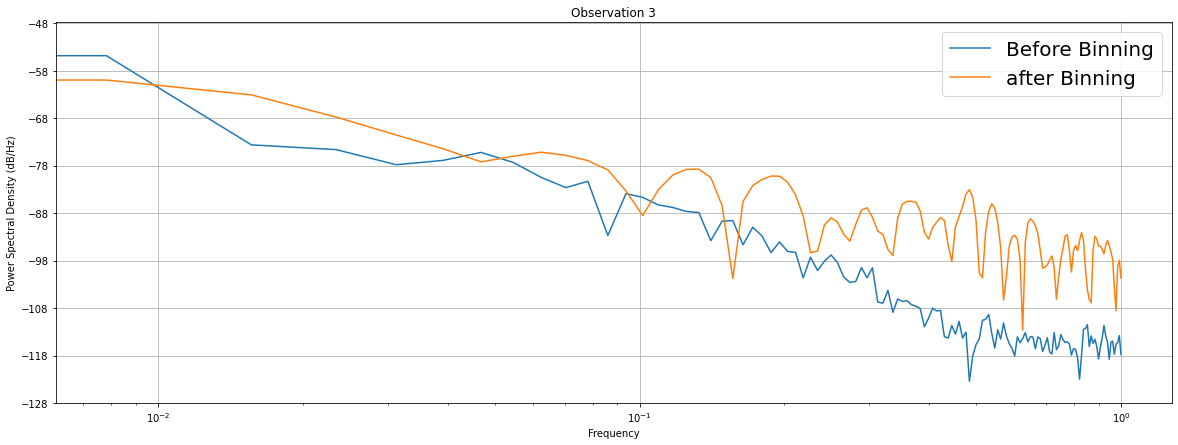

In [113]:
plt.figure(figsize = [20,7])
plt.title('Observation 3')
x = plt.psd(count_rate_b_3, label = 'Before Binning')
x = plt.psd(cr_binned_b_3, label = 'after Binning')
plt.legend(fontsize = 20)
plt.xscale('log')


### Observation 4

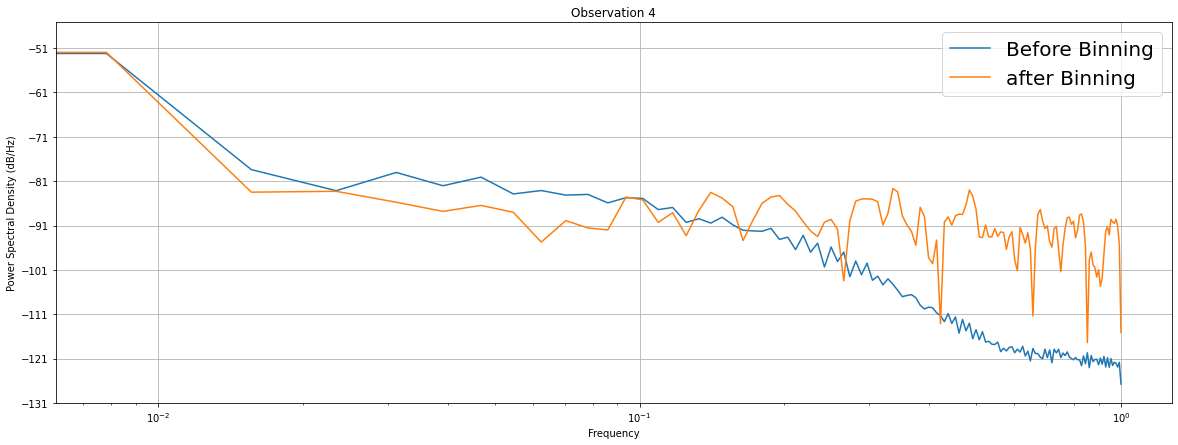

In [129]:
plt.figure(figsize = [20,7])
plt.title('Observation 4')
x = plt.psd(count_rate_b_4, label = 'Before Binning')
x = plt.psd(cr_binned_b_4, label = 'after Binning')
plt.legend(fontsize = 20)
plt.xscale('log')
